<a href="https://colab.research.google.com/github/KeyaSharmin/Computer-graphics/blob/main/CSE423_Project%20(Tree%20Plantation%20and%20Watering).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries Installing and window setup

In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np
import math

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 1000,1000
create_opengl_context((WIDTH, HEIGHT))

def addVertex(x,y):
    gl.glVertex2f(((2*x)/WIDTH),((2*y)/HEIGHT))

# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR))
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


# Line Drawing Algorithm
(8 way symmetry)

In [ ]:
def find_zone(x1,y1, x2, y2):
  dx = x2-x1
  dy = y2-y1
  if abs(dx)>=abs(dy):
    if dx>=0 and dy>=0:
      return 0 #zone 0
    elif dx>=0 and dy<0:
      return 7 #zone 7
    elif dx<0 and dy>=0:
      return 3 #zone 3
    else:
      return 4
  else:
    if dx>=0 and dy>=0:
      return 1 #zone 1
    elif dx>=0 and dy<0:
      return 6 #zone 7
    elif dx<0 and dy>=0:
      return 2 #zone 3
    else:
      return 5

In [ ]:
def convert_zone_to_z0(z, x, y):
  if z==1:
    return y,x
  elif z==2:
    return y,-x
  elif z==3:
    return -x,y
  elif z==4:
    return -x,-y
  elif z==5:
    return -y,-x
  elif z==6:
    return -y,x
  elif z==7:
    return x,-y

In [ ]:
def convert_zone_from_z0(z, x, y):
  if z==1:
    return y,x
  elif z==2:
    return -y,x
  elif z==3:
    return -x,y
  elif z==4:
    return -x,-y
  elif z==5:
    return -y,-x
  elif z==6:
    return y,-x
  elif z==7:
    return x,-y

In [ ]:
def draw_line(x1, y1, x2, y2):
  zone = find_zone(x1,y1, x2, y2)
  if zone != 0:
    x1, y1 = convert_zone_to_z0(zone, x1, y1)
    x2, y2 = convert_zone_to_z0(zone, x2, y2)
  dy = y2 - y1
  dx = x2 - x1
  d = 2*dy - dx
  incE = 2 * dy
  incNE = 2 * (dy - dx)
  x, y = (x1, y1)

  #point = []

  for x in range(x1, x2+1):
    if zone == 0:
        x_0, y_0 = (x, y)
    else:
        x_0, y_0 = convert_zone_from_z0(zone, x, y)
    #point.append((x_0,y_0))
    gl.glVertex2f((x_0 - 500)/500, (y_0 - 500)/500)
    #gl.glVertex2f(((2*x)/WIDTH),((2*y)/HEIGHT))
    x += 1
    if d>0:
        d = d + incNE
        y = y + 1
    else:
        d = d + incE
  #return point
def draw_Lines(x1, y1, x2, y2):
    gl.glBegin(gl.GL_LINES)
    addVertex(x1, y1)
    addVertex(x2, y2)
    gl.glEnd()

# Mid point circle drawing Algorithm

In [ ]:
def convert_from_z1(points_z1,z):
  points = []
  if z==0:
    for x, y in points_z1:
      points.append((y,x))
  elif z==3:
    for x, y in points_z1:
      points.append((-y,x))
  elif z==2:
    for x, y in points_z1:
      points.append((-x,y))
  elif z==5:
    for x, y in points_z1:
      points.append((-x,-y))
  elif z==4:
    for x, y in points_z1:
      points.append((-y,-x))
  elif z==7:
    for x, y in points_z1:
      points.append((y,-x))
  elif z==6:
    for x, y in points_z1:
      points.append((x,-y))
  return points

In [ ]:
def draw_circle(r, x, y):
  d = 1 - r
  x0 = 0
  y0 = r
  points_z1 = [(x0,y0)]
  while x0 < y0 :
    if d<0 :
      d = d + 2*x0 + 3 #choose E
      x0 += 1
    else:
      d = d + 2*x0 - 2*y0 + 5 #choose SE
      x0 += 1
      y0 -= 1
    points_z1.append((x0,y0))

  #zones_convert
  points = points_z1.copy()
  for z in [0,2,3,4,5,6,7]:
    points += convert_from_z1(points_z1, z)

  #return points
  #plot
  for i in range(len(points)):
    point_x = (points[i][0] + x)/400
    point_y = (points[i][1] + y)/400
    points[i] = (point_x, point_y)
    #gl.glVertex2f(points[i][0], points[i][1])
  return points

# Transformations

In [ ]:
def rotate(theta):
  a = math.cos(math.radians(theta))
  b = math.sin(math.radians(theta))

  r = np.array([[a, -b, 0],
              [b, a, 0],
              [0, 0, 1]])
  return r

In [ ]:
def scale(sc):
  s = np.array([[sc, 0, 0],
            [0, sc, 0],
            [0, 0, 1]])
  return s

In [ ]:
def translation(x, y):
  t = np.array([[1, 0, x],
            [0, 1, y],
            [0, 0, 1]])
  return t

In [ ]:
def transformation(arr, *argv):
  new_arr = []
  m = np.array([[1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]])
  for arg in argv:
    m = np.matmul(arg,m)

  for x,y in arr:
    pt = np.array([[x],
              [y],
              [1]])
    pt = np.matmul(m,pt)
    new_arr.append((pt[0][0], pt[1][0]))
  return new_arr

# Drawing part

In [ ]:
water_pot = [(-0.1,0.1),(0.15, 0.1),(0.15, -0.1),(-0.1, -0.1),(-0.1,-0.04),(-0.22,0.08),(-0.2,0.1),(-0.1,0.04),(-0.1,0.1)]

In [ ]:
#small plant
small_stem = [(-0.03,0),(0,0.15),(0.03,0),(-0.03,0)]
leaf = [(0,0.07),(0.08,0.18),(0,0.3),(-0.08,0.18),(0,0.07)]

In [ ]:
#big plant
big_tree = [(-0.24,0.25),(0.24,0.25),(0.144,0.4),(-0.144,0.4),(-0.2,0.4),(0.2,0.4),(0.096,0.55),(-0.096,0.55),(-0.152,0.55),(0,0.75),(0.152,0.55),(0.096,0.55)]
trunk = [(-0.05,0),(-0.05, 0.25),(0.05,0.25),(0.05,0)]

In [ ]:
#circle points
circle = draw_circle(100,0,0)

In [ ]:
def draw_House():
    gl.glBegin(gl.GL_POINTS)
    #house
    gl.glColor3f(0.30,0.15,0.00)
    draw_line(800,600,900,600)
    draw_line(800,500,900,500)
    draw_line(800,600,800,500)
    draw_line(900,600,900,500)
    #roof
    draw_line(800,600,850,660)
    draw_line(850,660,900,600)
    #door
    draw_line(840,500,840,580)
    draw_line(840,580,860,580)
    draw_line(860,580,860,500)

    gl.glEnd()

def road():
    gl.glBegin(gl.GL_POINTS)
    gl.glColor3f(0.30,0.15,0.00)
    draw_line(550,600,900,0)
    draw_line(640,600,1000,100)
    gl.glEnd()

plot_of_land = [(0,0),(-350,0),(-460,-270),(250,-270)]

In [ ]:

# Let's render something!
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(5)

#sky
gl.glColor3f(0.82,0.96,1.00)
for i in range(-500,501,1):
  draw_Lines(i,500,i,-500)

#sun
gl.glColor3f(1.00,0.85,0.10)
gl.glPointSize(5) #size of point
sun_1 = transformation(circle, scale(0.5), translation(-0.5,0.7))
gl.glBegin(gl.GL_POINTS)
for a,b in sun_1:
  gl.glVertex2f(a,b)
gl.glEnd()

#land space
gl.glColor3f(0.84,0.63,0.31)
for i in range(-500,501,1):
  draw_Lines(i,100,i,-500)

#house and road using mid point line algo
draw_House()
road()

#Plot of land for gardening
gl.glColor3f(0.84,1,0.33)
for i in range(-350,0,1):
  draw_Lines(i,0,i-110,-270)
for i in range(250,-110,-1):
  draw_Lines(0,0,i-110,-270)

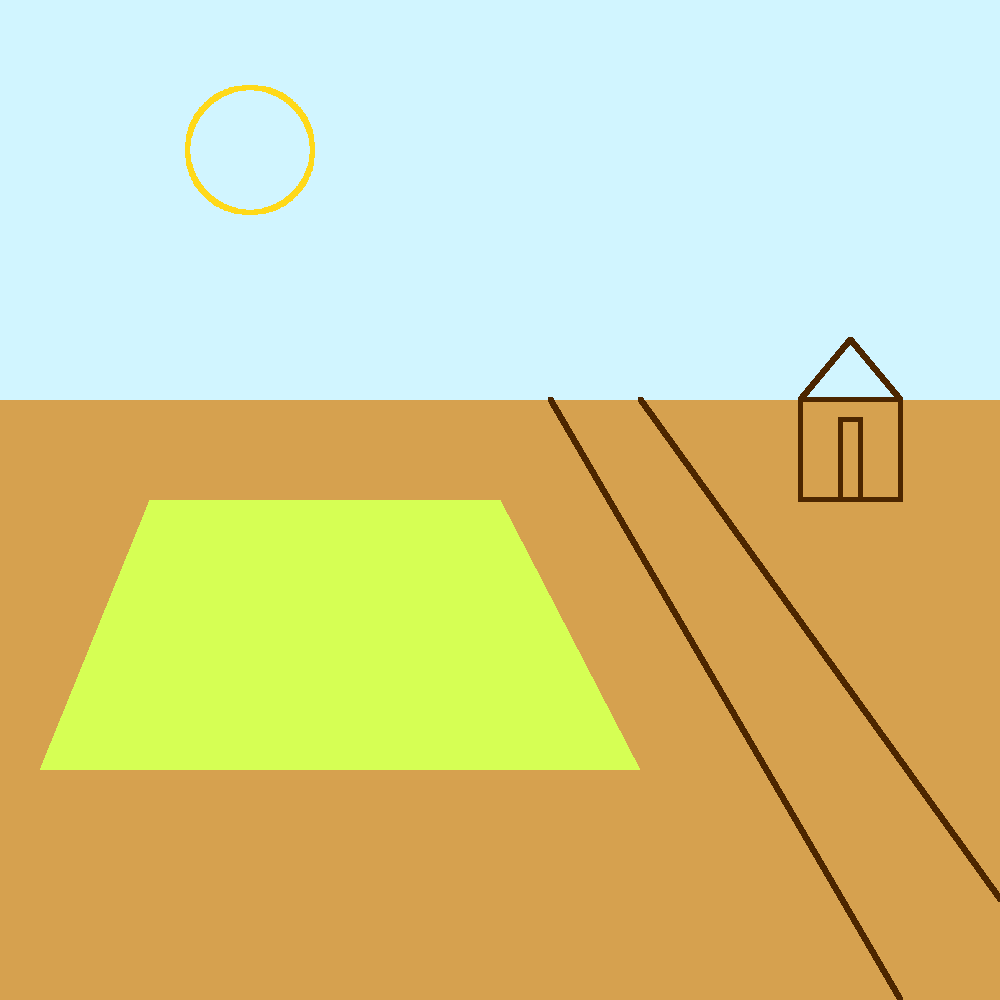

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

In [ ]:
n = int(input("Enter the number of plant (0-6): "))
if n>6:
    n=6
spots = [(-0.6,-0.2), (-0.34, -0.2),(-0.1,-0.2),(-0.7,-0.54),(-0.3,-0.54),(0.1,-0.54)]

Enter the number of plant (0-6): 6


In [ ]:
def small_plant(a,b,sc):
  gl.glColor3f(0.07,0.79,0)
  gl.glBegin(gl.GL_QUADS)
  leaf_1 = transformation(leaf, scale(sc), translation(a,b))
  for a,b in leaf_1:
    gl.glVertex2f(a,b)
  gl.glEnd()

  gl.glColor3f(0.55,0.27,0.07)
  gl.glBegin(gl.GL_QUADS)
  small_stem_1 = transformation(small_stem, scale(sc), translation(a,b))
  for a,b in small_stem_1:
    gl.glVertex2f(a,b)
  gl.glEnd()

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(5)

#sky
gl.glColor3f(0.82,0.96,1.00)
for i in range(-500,500,1):
  draw_Lines(i,500,i,-500)

#sun
gl.glColor3f(1.00,0.67,0.00)
gl.glPointSize(5) #size of point
sun_2 = transformation(circle, scale(0.5), translation(-0.2,0.5))
gl.glBegin(gl.GL_POINTS)
for a,b in sun_2:
  gl.glVertex2f(a,b)
gl.glEnd()

#land space
gl.glColor3f(0.84,0.63,0.31)
for i in range(-500,501,1):
  draw_Lines(i,100,i,-500)


#Plot of land for gardening
gl.glColor3f(0.84,1,0.33)
for i in range(-350,0,1):
  draw_Lines(i,0,i-110,-270)
for i in range(250,-110,-1):
  draw_Lines(0,0,i-110,-270)

draw_House()
road()


spots_1 = spots[:n]
i = 0
for a,b in spots_1:
  if i<3:
    small_plant(a,b,1)
  else:
    small_plant(a,b,1.2)
  i += 1

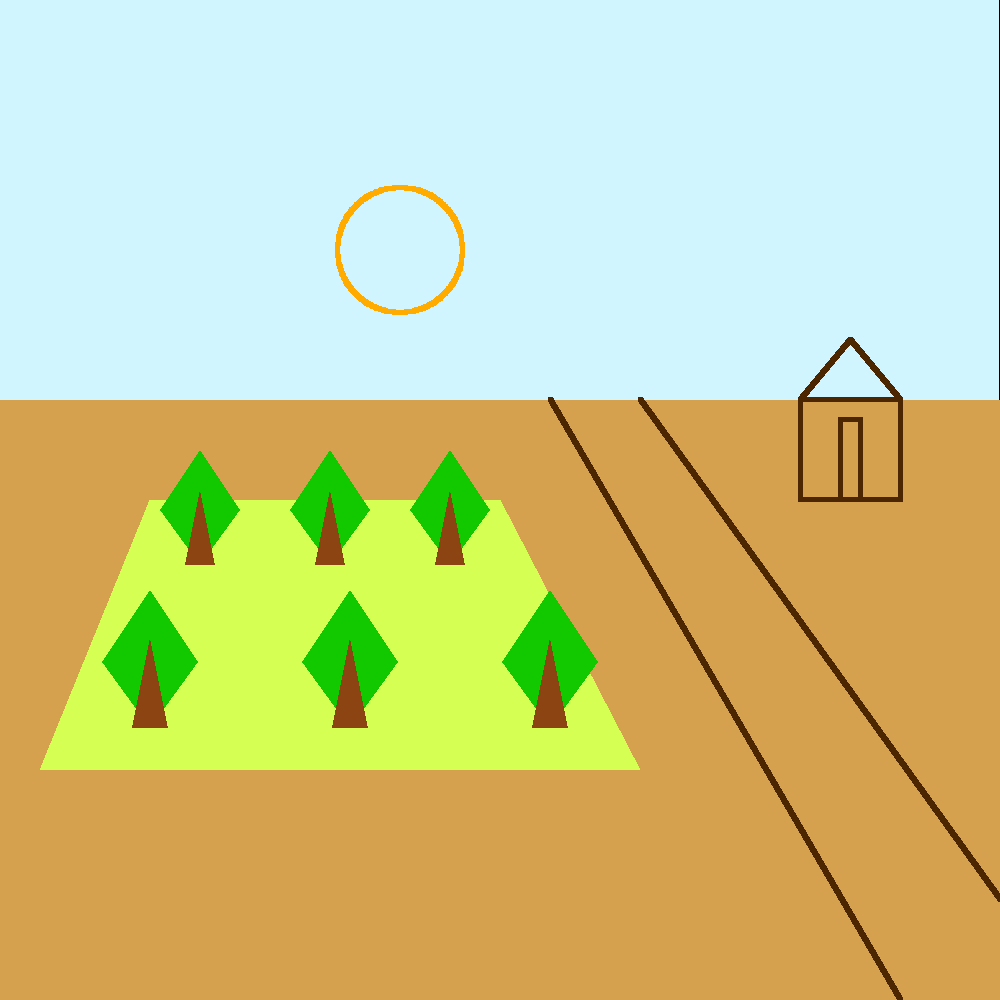

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

In [ ]:
water = input("Pick which plants to water (e.g.0110 if we planted 4 plants):")

Pick which plants to water (e.g.0110 if we planted 4 plants):110101


In [ ]:
i=0
for a,b in spots_1:
    if water[i] == "1":
        gl.glColor3f(0,0,1.0)
        gl.glBegin(gl.GL_QUADS)
        water_pot_1 = transformation(water_pot, scale(0.4), rotate(20), translation(a+0.1,b+0.08))
        for v,t in water_pot_1:
            gl.glVertex2f(v,t)
        gl.glEnd()
    i += 1

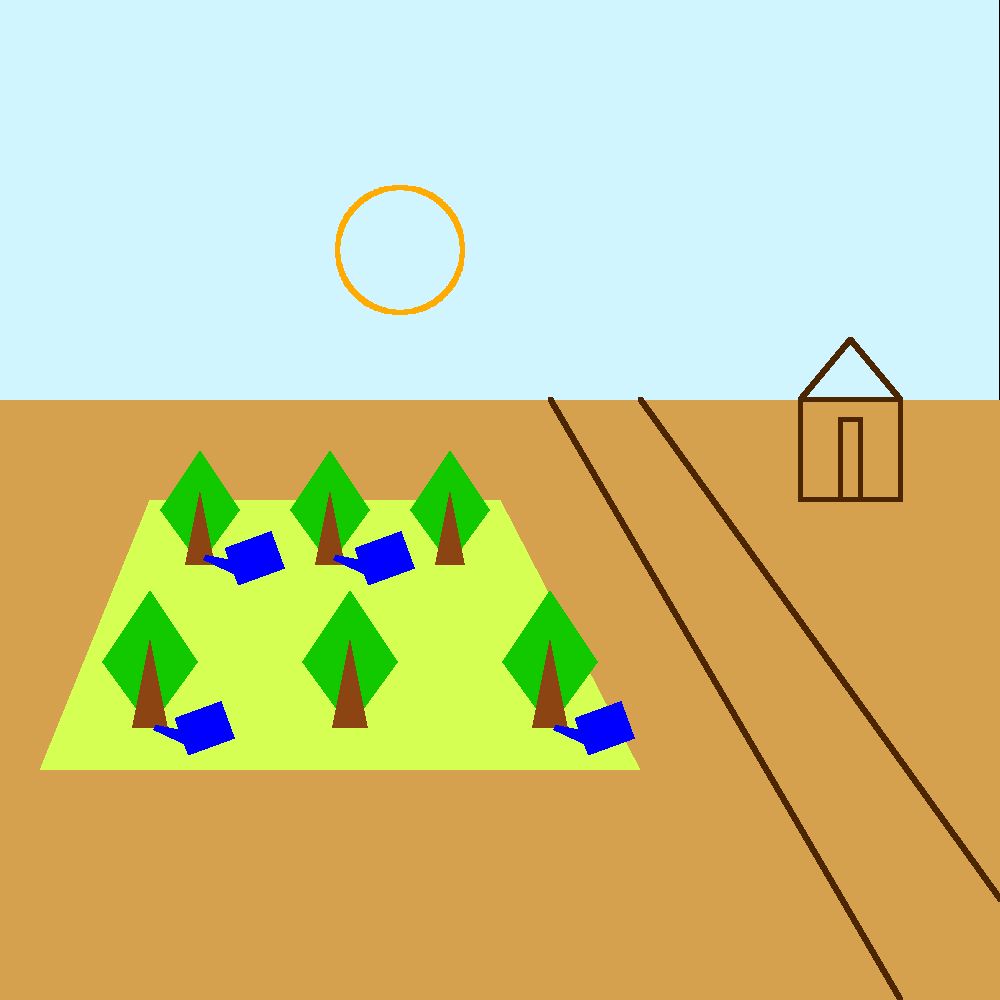

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))

In [ ]:
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
gl.glPointSize(5)

#sky
gl.glColor3f(0.82,0.96,1.00)

for i in range(-500,500,1):
  draw_Lines(i,500,i,-500)

#sun
gl.glColor3f(1.0,0,0)
gl.glPointSize(5) #size of point
sun_3 = transformation(circle, scale(0.5), translation(0,0.2))
gl.glBegin(gl.GL_POINTS)
for a,b in sun_3:
  gl.glVertex2f(a,b)
gl.glEnd()

#land space
gl.glColor3f(0.84,0.63,0.31)
for i in range(-500,501,1):
  draw_Lines(i,100,i,-500)

#house
gl.glColor3f(.5,.3,.7)
draw_House()

#Plot of land
gl.glColor3f(0.84,1,0.33)
for i in range(-350,0,1):
  draw_Lines(i,0,i-110,-270)
for i in range(250,-110,-1):
  draw_Lines(0,0,i-110,-270)


#road
road()


i=0
for a,b in spots_1:
  if i<3:
    if water[i] == "0":
        #small plant
        small_plant(a,b,1)
    else:
        #tree
        gl.glColor3f(0.0+0.05*i,0.5+0.05*i,0.0)
        gl.glBegin(gl.GL_QUADS)
        big_tree_1 = transformation(big_tree, scale(0.9), translation(a+0.05,b+0.05))
        for v,t in big_tree_1:
            gl.glVertex2f(v,t)
        gl.glEnd()
        gl.glColor3f(0.55,0.27,0.07)
        gl.glBegin(gl.GL_QUADS)
        trunk_1 = transformation(trunk, scale(0.9), translation(a+0.05,b+0.05))
        for a,b in trunk_1:
            gl.glVertex2f(a,b)
        gl.glEnd()
  else:
    if water[i] == "0":
        #small plant
        small_plant(a,b,1.2)
    else:
        #tree
        gl.glColor3f(0.0+0.05*i,0.5+0.05*i,0.0)
        gl.glBegin(gl.GL_QUADS)
        big_tree_1 = transformation(big_tree, scale(1.1), translation(a+0.05,b+0.05))
        for v,t in big_tree_1:
            gl.glVertex2f(v,t)
        gl.glEnd()
        gl.glColor3f(0.55,0.27,0.07)
        gl.glBegin(gl.GL_QUADS)
        trunk_1 = transformation(trunk, scale(1.1), translation(a+0.05,b+0.05))
        for a,b in trunk_1:
            gl.glVertex2f(a,b)
        gl.glEnd()
  i += 1




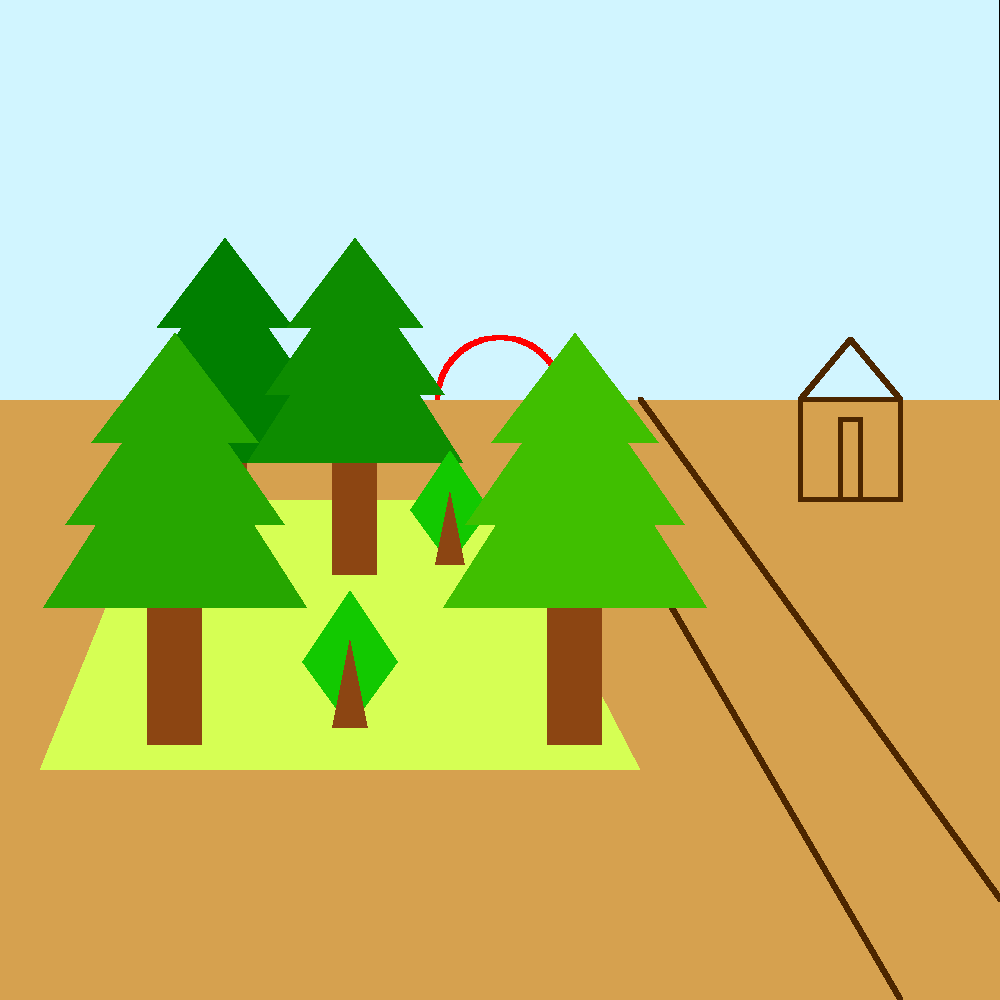

In [ ]:
from IPython.display import display
from PIL import Image

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))